# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150 # increase image resolution

# How does Scikit-Learn Library's KNN work?

In [29]:
# Define weight function to print what Scikit-Learn does.
def weight_print(weights):
    print('weight:',weights)
    return None

In [30]:
# Create a sample dataset.
sample_X = np.array([10,1,2,5,6,5,7,0,2,1]).reshape(-1,1)
sample_y = np.array([2.3,0.2,0.5,1,1.6,1.5,1.4,0.1,0.5,0.2])

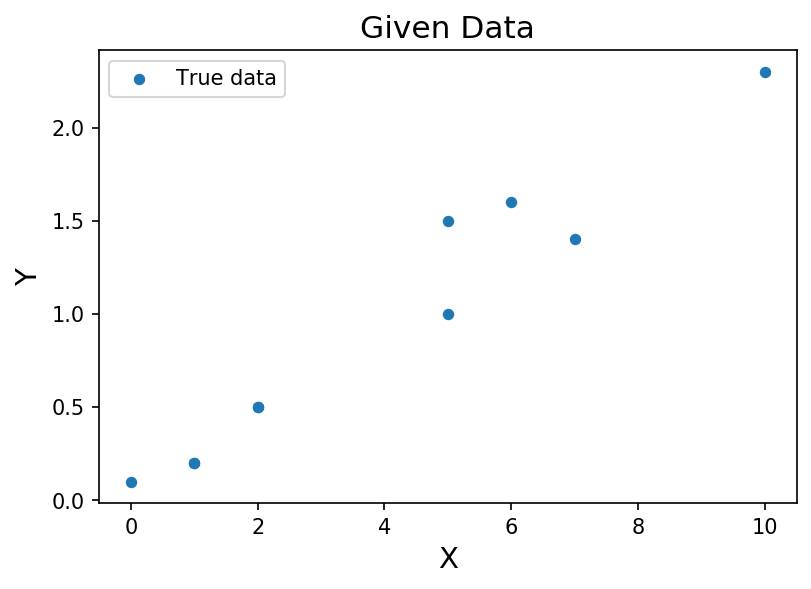

In [31]:
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.title('Given Data',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

In [32]:
# Use our custom weight function to fit a model and predict a single point
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,weights=weight_print)
knn.fit(sample_X, sample_y)
predicted_single_point = knn.predict([[1]])
print('predicred_y:',predicted_single_point)

weight: [[0. 0. 1. 1. 1.]]
predicred_y: [0.3]


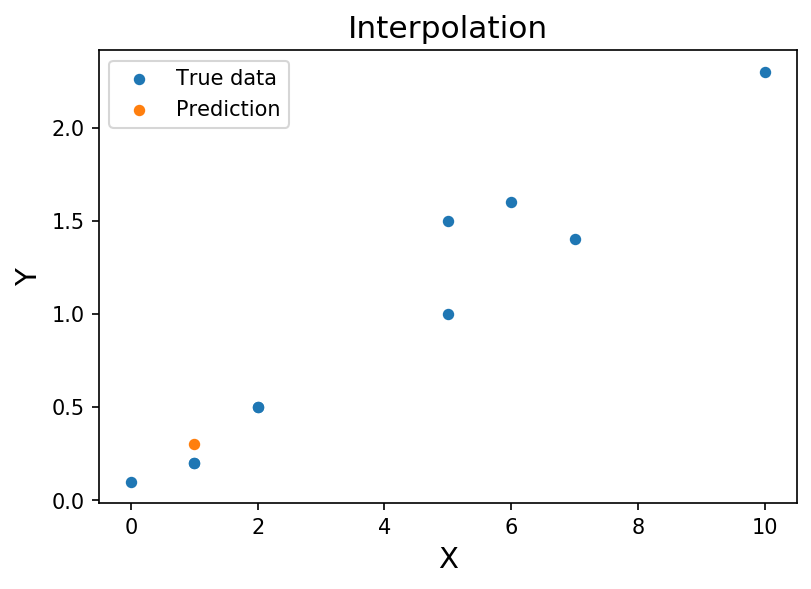

In [33]:
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.scatter([1],predicted_single_point,label='Prediction',s=20)
plt.title('Interpolation',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

# Let's Interpolate

In [34]:
# Generate 1000 dense data points
test_X = (np.array(list(range(0,1000)))/100).reshape(-1,1)
y_pred = knn.predict(test_X)
y_pred

weight: [[0.   1.   1.   2.   2.  ]
 [0.01 0.99 0.99 1.99 1.99]
 [0.02 0.98 0.98 1.98 1.98]
 ...
 [0.03 2.97 3.97 4.97 4.97]
 [0.02 2.98 3.98 4.98 4.98]
 [0.01 2.99 3.99 4.99 4.99]]


array([0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.

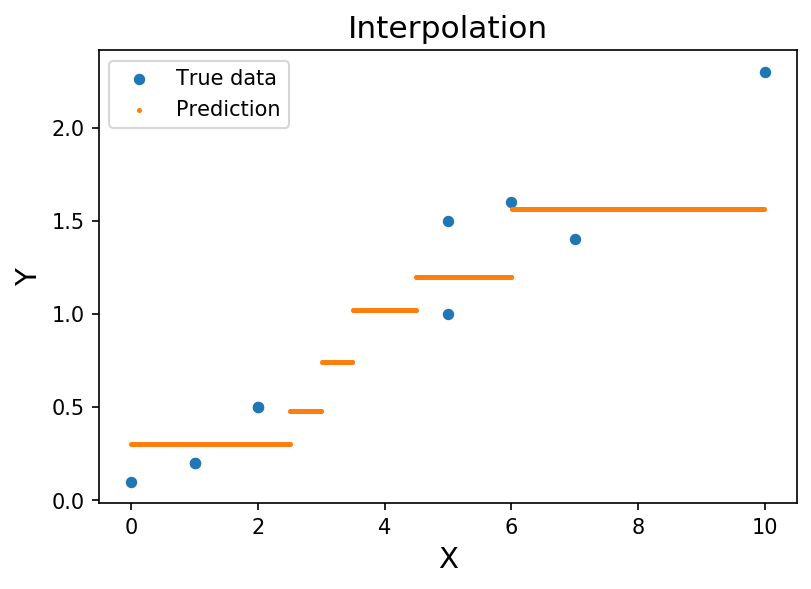

In [35]:
# Use default Uniform Weight
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.scatter(test_X,y_pred,label='Prediction',s=2)
plt.title('Interpolation',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

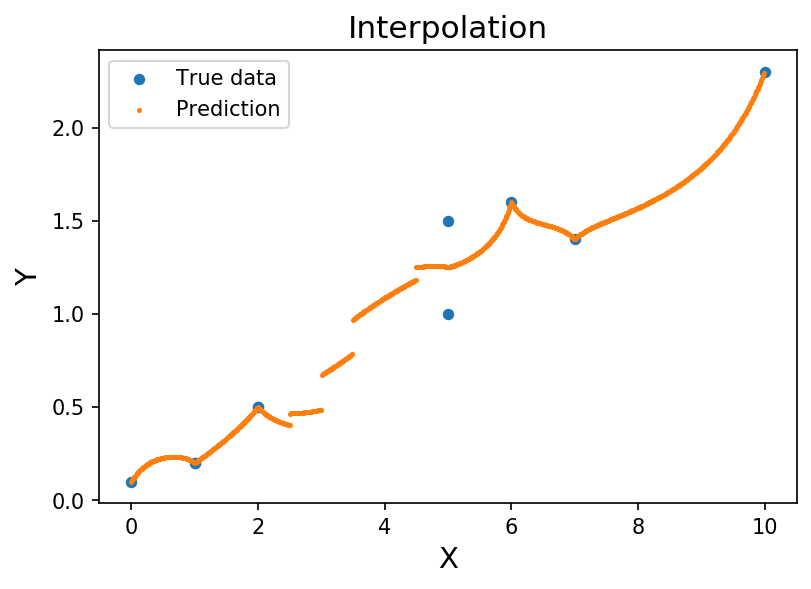

In [37]:
# Use Inverse Distance Weight
knn = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(sample_X, sample_y)
y_pred = knn.predict(test_X)
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.scatter(test_X,y_pred,label='Prediction',s=2)
plt.title('Interpolation',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

# Using Gaussian Kernel

In [77]:
# define gaussian kernel
def gaussian_kernel(distances):
    kernel_width = 2 # You have to tune this later
    weights = np.exp(-(distances**2)/kernel_width)
    return weights

In [78]:
# Use our previously generated data with new weighting function
knn = KNeighborsRegressor(n_neighbors=5,weights=gaussian_kernel)
knn.fit(sample_X, sample_y)
y_pred_gauss = knn.predict(test_X)

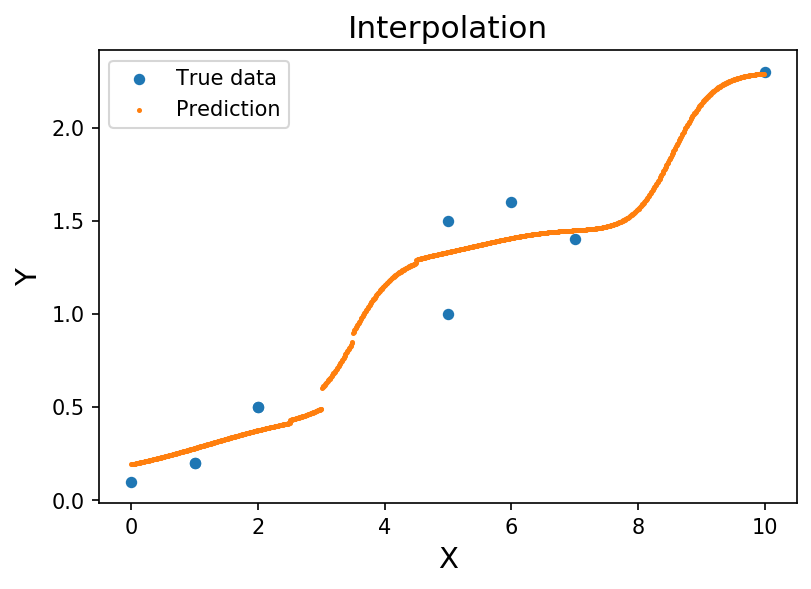

In [79]:
# Plot our new predicted points
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.scatter(test_X,y_pred_gauss,label='Prediction',s=2)
plt.title('Interpolation',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

# Try Other Values for Kernel Width!!! Plot will change.
* To Tune the kernel width, you will either want to do one of the two:
    1. If for only quick visualization purpose, you can choose visually appealing parameter
    2. If you are trying to actually predict well, you need to split train test data and do cross-validation for each kernel width parameter. I recommend using grid search. (i.e., get accuracy for kernel_width=0.2, 0.4, 0.6, 0.8 and compare)
* I highly recommend #2 if you are tuning the model seriously or presenting the plot seriously.